In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.style.use('bmh')

# Exploratory Data Analysis

### Importing and exploring dataset

In [3]:
df = pd.read_csv('insurance_prices.csv')
df.head()

,Brand,Model,Version,Transmission,Year,Age,Sex,Policy,Insurance_company,Price
0,Nissan,VERSA,ADVANCE,Aut,2012,18,H,Amplia,ANA,"6,353.21"
1,Nissan,VERSA,ADVANCE,Aut,2012,18,H,Amplia,Qualitas,"6,764.61"
2,Nissan,VERSA,ADVANCE,Aut,2012,18,H,Amplia,ABA,"7,179.27"
3,Nissan,VERSA,ADVANCE,Aut,2012,18,H,Amplia,Seguros Atlas,"7,390.27"
4,Nissan,VERSA,ADVANCE,Aut,2012,18,H,Amplia,AXA,"7,513.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              35952 non-null  object
 1   Model              35952 non-null  object
 2   Version            35952 non-null  object
 3   Transmission       35952 non-null  object
 4   Year               35952 non-null  int64 
 5   Age                35952 non-null  int64 
 6   Sex                35952 non-null  object
 7   Policy             35952 non-null  object
 8   Insurance_company  35952 non-null  object
 9   Price              35952 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.7+ MB


#### Converting price column to float

In [5]:
df = df.replace(',','', regex=True)
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

#### Exploring price data distribution

count    35952.000000
mean      5655.003005
std       1807.961833
min       2171.220000
25%       4433.340000
50%       5431.410000
75%       6669.930000
max      21128.990000
Name: Price, dtype: float64


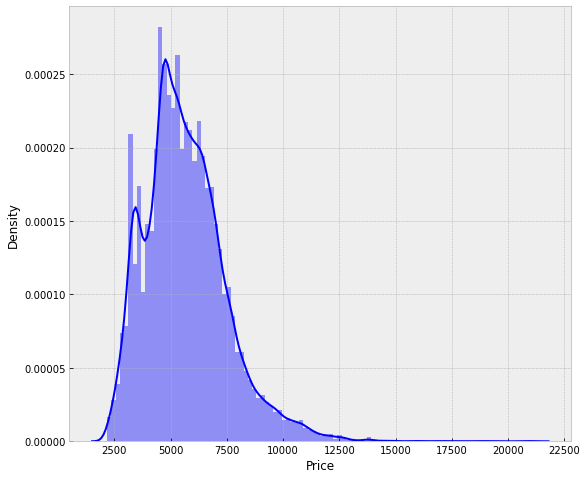

In [6]:
print(df['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Price'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [7]:
df_ages = df.groupby(['Age','Sex']).mean().drop(columns='Year')
df_ages

Price
Age Sex             
18  H    6679.915199
    M    6619.932037
25  H    6173.863805
    M    6117.004677
30  H    5809.289015
    M    5703.635903
35  H    5516.225136
    M    5459.898793
40  H    5355.051379
    M    5304.238298
45  H    5177.261947
    M    5116.633594
50  H    5106.018466
    M    5031.073820

<AxesSubplot:xlabel='Age,Sex'>

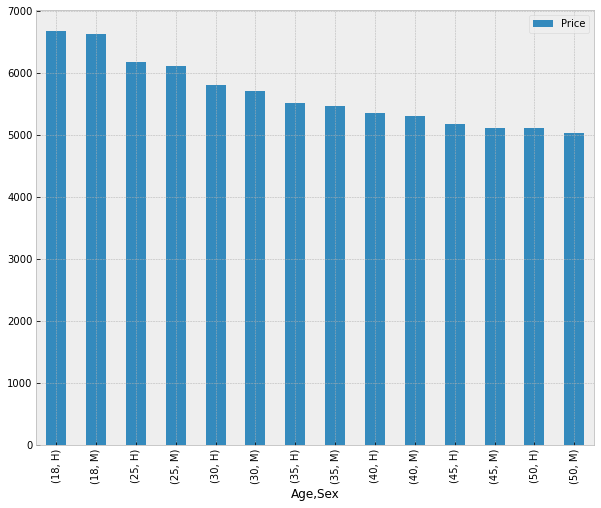

In [8]:
df_ages.plot(kind='bar', figsize=(10,8))

#### Exploring categorical values

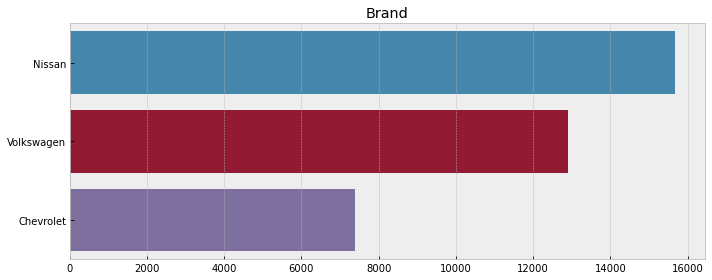

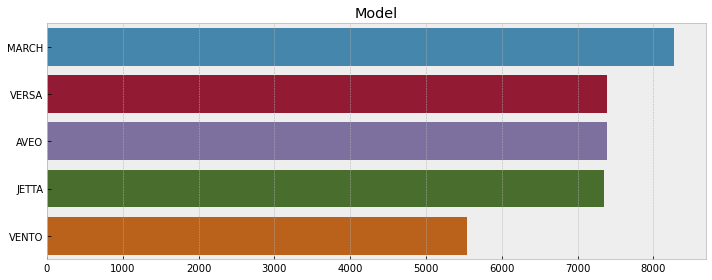

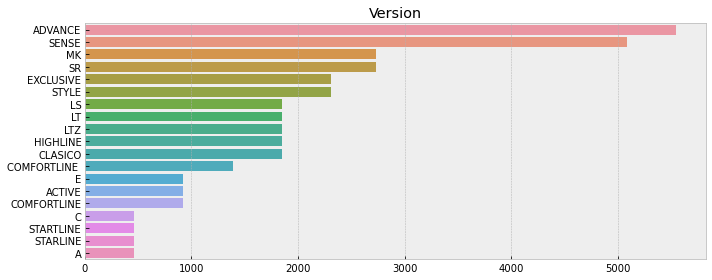

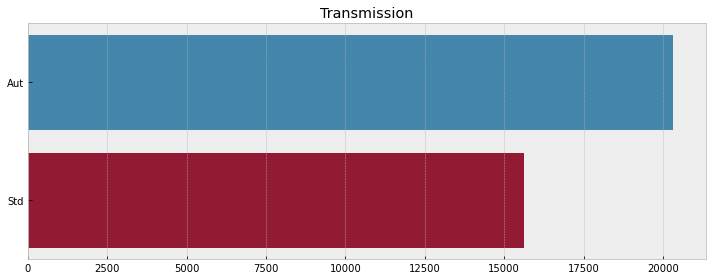

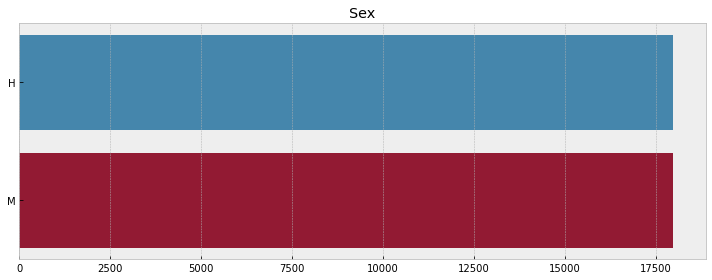

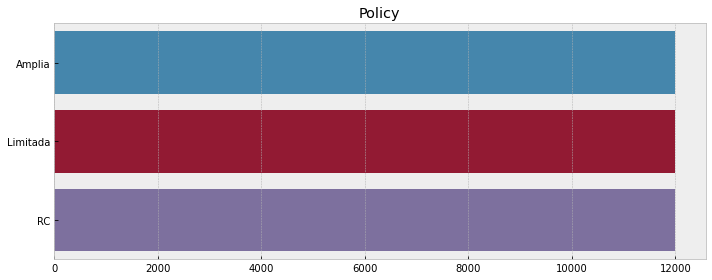

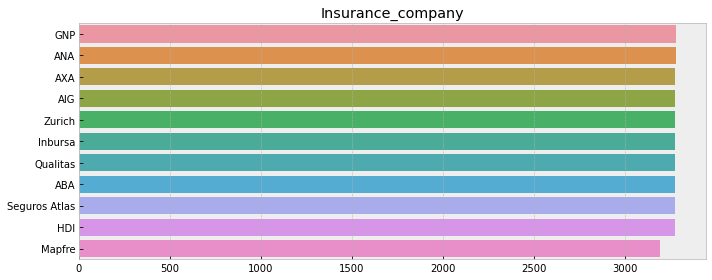

In [9]:
categorcial_variables = ['Brand', 'Model', 'Version', 'Transmission', 'Sex', 'Policy', 'Insurance_company']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

### Getting dummy variables

In [10]:
df = pd.get_dummies(df, columns=['Model', 'Transmission', 'Age', 'Brand', 'Version', 'Year', 'Sex', 'Policy', 'Insurance_company'], drop_first=True)
df.head()

,Price,Model_JETTA,Model_MARCH,Model_VENTO,Model_VERSA,Transmission_Std,Age_25,Age_30,Age_35,Age_40,...,Insurance_company_AIG,Insurance_company_ANA,Insurance_company_AXA,Insurance_company_GNP,Insurance_company_HDI,Insurance_company_Inbursa,Insurance_company_Mapfre,Insurance_company_Qualitas,Insurance_company_Seguros Atlas,Insurance_company_Zurich
0,6353.21,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,6764.61,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,7179.27,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7390.27,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,7513.00,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Price                            35952 non-null  float64
 1   Model_JETTA                      35952 non-null  uint8  
 2   Model_MARCH                      35952 non-null  uint8  
 3   Model_VENTO                      35952 non-null  uint8  
 4   Model_VERSA                      35952 non-null  uint8  
 5   Transmission_Std                 35952 non-null  uint8  
 6   Age_25                           35952 non-null  uint8  
 7   Age_30                           35952 non-null  uint8  
 8   Age_35                           35952 non-null  uint8  
 9   Age_40                           35952 non-null  uint8  
 10  Age_45                           35952 non-null  uint8  
 11  Age_50                           35952 non-null  uint8  
 12  Brand_Nissan      

# Decision Tree Regression

#### Importing Decision Tree Regression module

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#### Creating X and y variables

In [13]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

#### Splitting dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#### Feature scaling

In [15]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)

#### Training the dataset

In [16]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Accuracy

In [17]:
cvs = cross_val_score(regressor, X_test, y_test, cv=10)
cvs

array([0.87228591, 0.78412967, 0.7943663 , 0.8847869 , 0.81345142,
       0.78035883, 0.84913777, 0.81357219, 0.86525554, 0.89928892])

#### Cross Validation mean

In [18]:
cvs.mean()

0.8356633459330272

#### Cross Validation standard deviation

In [19]:
cvs.std()

0.04154630004266215